<a href="https://colab.research.google.com/github/MiguelAngeloTr/Datathon/blob/main/DICOM_in_PY_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a las imágenes DICOM
**DICOM** (Digital Imaging and Communications in Medicine) es el estándar internacional para el almacenamiento, intercambio y transmisión de imágenes médicas (como radiografías, resonancias, tomografías) junto con información asociada (como datos del paciente, tipo de estudio, fecha, etc.).

- Estandarización: Permite que las imágenes médicas de distintos equipos y hospitales se puedan usar de manera uniforme, lo cual es esencial para entrenar modelos de IA con datos consistentes.

- Metadatos clínicos: DICOM incluye información contextual (edad, sexo, modalidad, diagnóstico clínico, etc.), útil para enriquecer los modelos de IA.

- Trazabilidad y anonimización: Facilita mantener el control sobre el origen de los datos y aplicar técnicas de anonimización necesarias para cumplir normativas éticas y legales.

- Integración con sistemas hospitalarios: Su compatibilidad con PACS y RIS permite a los algoritmos de IA integrarse directamente en los flujos de trabajo clínico.

## Librerias

- Pydicom: Permite leer, modificar y guardar datos DICOM de forma sencilla y al estilo de Python.
- Imageio: Ofrece una interfaz simple para leer y escribir diversos tipos de datos de imagen, como imágenes animadas, volúmenes y formatos científicos.

In [ ]:
!pip install pydicom
!pip install imageio
!pip install pyradiomics
!pip install pynrrd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 14.6 MB/s eta 0:00:00


In [ ]:
import pydicom
import imageio
import matplotlib.pyplot as plt

In [ ]:
# imagen de ejemplo
from pydicom.data import get_testdata_file
path = get_testdata_file("CT_small.dcm")

In [ ]:
#lectura de image con pydicom
im=pydicom.dcmread(path)

In [ ]:
#lectura con imageio
ima=imageio.imread(path)

<ipython-input-127-6b62b26ab150>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ima=imageio.imread(path)


### Manejo de metadadtos

In [ ]:
#pydicom
Meta=im.items()

In [ ]:
# imageio
meta=ima.meta

### accesso a los diferentes tags

In [ ]:
# ¿Cómo se accede a los diferentes tags?
# ¿por que es importante su manipulación?

### Visualiación de imágenes

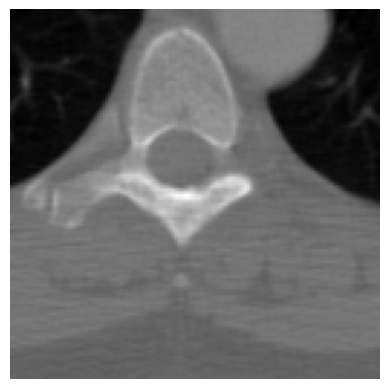

In [ ]:
# ploteo de imagen usandi imageio
plt.imshow(ima, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
#cómo se ploteralisa si use pydicom para la lectura de la imágen?


### Leer más de una imagen

In [ ]:
import numpy as np
import os
from google.colab import drive
from scipy import ndimage as ndi
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#ruta de la carpeta
dirname='/content/drive/MyDrive/DICOM_ANON'

In [ ]:
# Leer archivos DICOM y recolectar los datasets usando pydicom
dicom_slices = []
ct_dirname=os.path.join(dirname,'CT')
for filename in os.listdir(ct_dirname):
      filepath = os.path.join(ct_dirname,filename)
      ds = pydicom.dcmread(filepath)
      dicom_slices.append(ds.pixel_array)
vol=np.stack(dicom_slices)

In [ ]:
print(vol.shape)

(107, 512, 512)


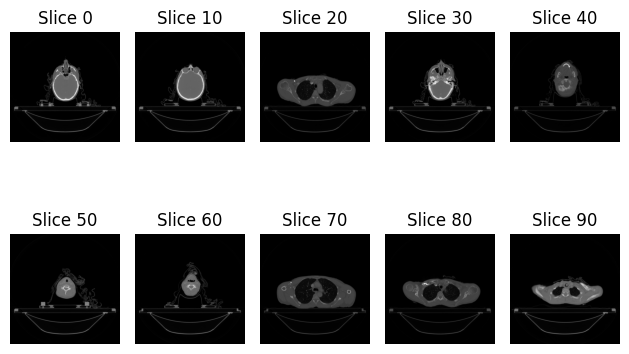

In [ ]:
#use for loop to plot images
fig, axes = plt.subplots(nrows=2,ncols=5)
axes = axes.ravel()  #aplanando
for j in range(10):
    im = vol[j * 10, :, :]
    axes[j].imshow(im, cmap='gray')
    axes[j].axis('off')
    axes[j].set_title(f'Slice {j*10}')

plt.tight_layout()
plt.show()

In [ ]:
# Que pasa si la carpeta no trajera las imágenes ordenadas ¿cómo podría organizarlas usando pydicom?
# Visualiza en un subplot varios cortes despues de orgaanizarlo

In [ ]:
volio=imageio.volread(uri=ct_dirname,format='DICOM')

Reading DICOM (examining files): 1/107 files (0.9%)26/107 files (24.3%)46/107 files (43.0%)68/107 files (63.6%)84/107 files (78.5%)96/107 files (89.7%)107/107 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 8/107  (7.5%)20/107  (18.7%)28/107  (26.2%)40/107  (37.4%)53/107  (49.5%)64/107  (59.8%)79/107  (73.8%)98/107  (91.6%)107/107  (100.0%)


#### Forma, muestreo y campo de visión

In [ ]:
#forma
n0, n1, n2 = volio.shape
n0, n1, n2

(107, 512, 512)

In [ ]:
#muestreo
d0, d1, d2 = volio.meta['sampling']
d0, d1, d2

(3.0, 1.12, 1.12)

In [ ]:
# Field of view (in mm)
n0 * d0, n1 * d1, n2 * d2

(321.0, 573.44, 573.44)

#### Visualizaciones

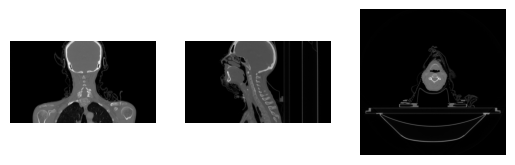

In [ ]:
#plot the images
#compute aspect radio
d0,d1,d2= volio.meta.sampling
asp1 = d0 / d2
asp2 = d0 / d1
fig, axes =plt.subplots(nrows=1,ncols=3)
axes[0].imshow(volio[:,256,:], cmap='gray', aspect=asp1)
axes[1].imshow(volio[:,:,256], cmap='gray',aspect=asp2)
axes[2].imshow(volio[56,:,:], cmap='gray')
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
plt.show()

#### Histograma

<ipython-input-144-ed9308ceeeff>:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


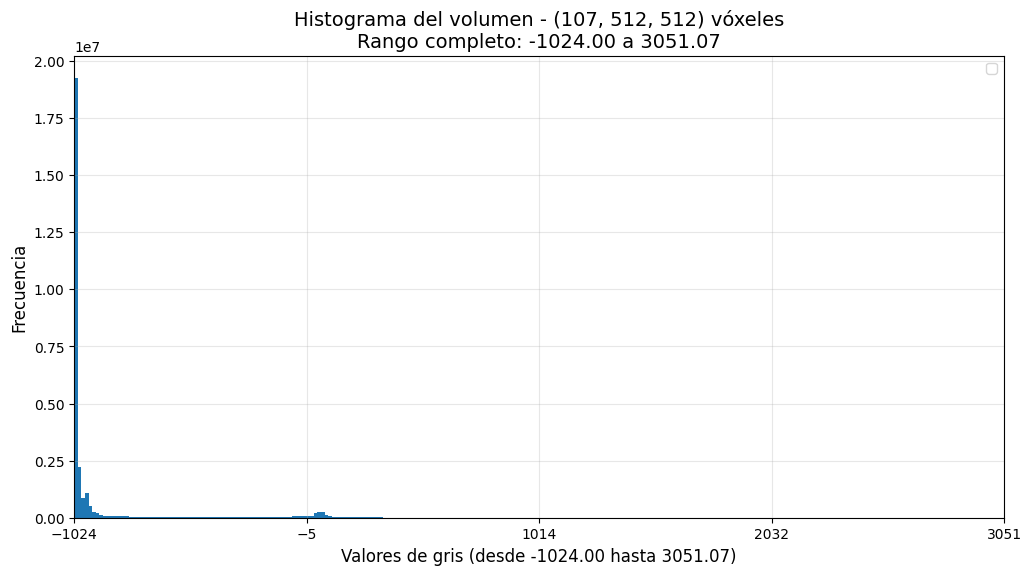

In [ ]:
# Calcular histograma con 256 bins en el rango completo de valores
min_val = volio.min()
max_val = volio.max()
hist = ndi.histogram(volio, min=min_val, max=max_val, bins=256)
# Crear los valores del eje X (centros de los bins)
bin_edges = np.linspace(min_val, max_val, 257)  # 256 bins necesitan 257 bordes
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Centro de cada bin

# Configurar el gráfico
plt.figure(figsize=(12, 6))

# Graficar histograma con valores reales en X
plt.bar(bin_centers, hist, width=(max_val-min_val)/256, align='center')

# Configurar eje X con el rango completo de valores
plt.xlim([min_val, max_val])
plt.xticks(np.linspace(min_val, max_val, 5))  # 5 marcas equidistantes

# Añadir etiquetas y título
plt.xlabel(f'Valores de gris (desde {min_val:.2f} hasta {max_val:.2f})', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title(f'Histograma del volumen - {volio.shape} vóxeles\nRango completo: {min_val:.2f} a {max_val:.2f}', fontsize=14)

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

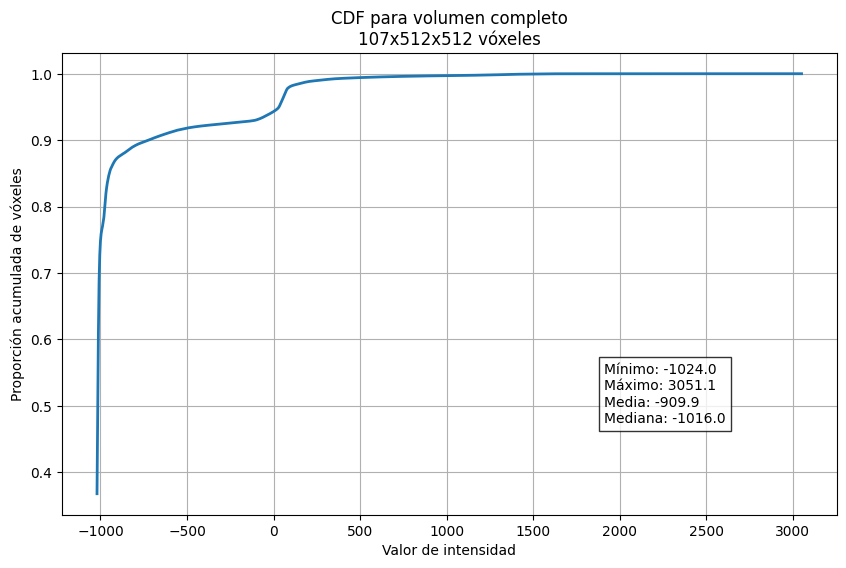

In [ ]:
# Calcular CDF para volumen completo
vol_flat = volio.flatten()
hist, bin_edges = np.histogram(vol_flat, bins=1024, density=True)
cdf = np.cumsum(hist) * (bin_edges[1] - bin_edges[0])

# Gráfico 3D CDF
plt.figure(figsize=(10, 6))
plt.plot(bin_edges[1:], cdf, linewidth=2)
plt.xlabel('Valor de intensidad')
plt.ylabel('Proporción acumulada de vóxeles')
plt.title(f'CDF para volumen completo\n{volio.shape[0]}x{volio.shape[1]}x{volio.shape[2]} vóxeles')

# Añadir información estadística
stats_text = (f"Mínimo: {volio.min():.1f}\n"
             f"Máximo: {volio.max():.1f}\n"
             f"Media: {volio.mean():.1f}\n"
             f"Mediana: {np.median(vol_flat):.1f}")
plt.gca().text(0.7, 0.2, stats_text, transform=plt.gca().transAxes,
              bbox=dict(facecolor='white', alpha=0.8))

plt.grid(True)
plt.show()

<ipython-input-146-24f048fa62c8>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


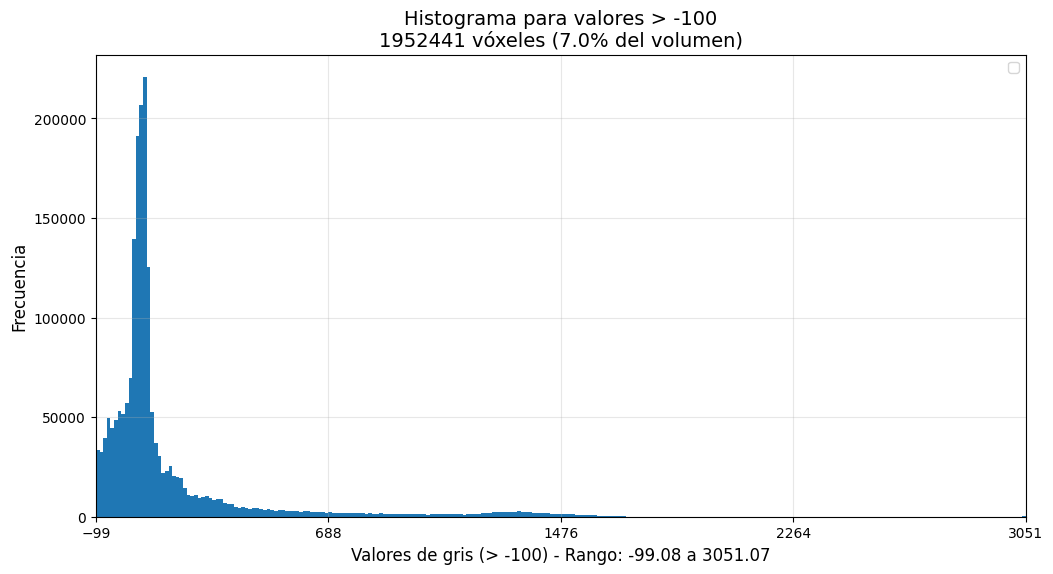

In [ ]:
# Filtrar valores mayores a -100
filtered_data = volio[volio > -100]
min_val = filtered_data.min()
max_val = filtered_data.max()

# Calcular histograma con 256 bins en el rango filtrado
hist, bin_edges = np.histogram(filtered_data, bins=256, range=(min_val, max_val))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Configurar el gráfico
plt.figure(figsize=(12, 6))

# Graficar histograma
plt.bar(bin_centers, hist, width=(max_val-min_val)/256, align='center')

# Configuraciones del eje X
plt.xlim([min_val, max_val])
plt.xticks(np.linspace(min_val, max_val, 5))

# Añadir etiquetas y título
plt.xlabel(f'Valores de gris (> -100) - Rango: {min_val:.2f} a {max_val:.2f}', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title(f'Histograma para valores > -100\n{filtered_data.size} vóxeles ({100*filtered_data.size/volio.size:.1f}% del volumen)', fontsize=14)


plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Mascaras

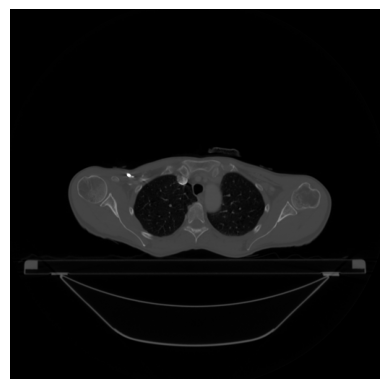

In [ ]:
img=volio[95,:,:]
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

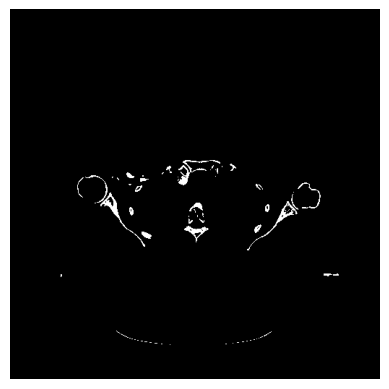

In [ ]:
#creación de mascara sencilla
mask=img>300
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
#¿cómo aplico la mascara a la imágen original para conservar valores?
#plotea la imagen resultante

### Tuneo de mascaras

In [ ]:
from scipy import ndimage as ndi
mask_erosionada=ndi.binary_dilation(mask,iterations=5)
imagen_filtrada = img * mask_erosionada

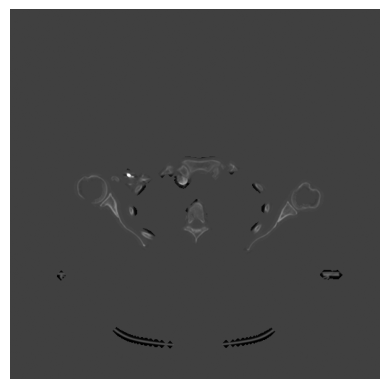

In [ ]:
plt.imshow(imagen_filtrada,cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
#CREA UNA MASCARA EROSIONADA CON 5 ITERACIONES Y PLOTEA EL RESULTADO

### Convoluciones (Filtros)

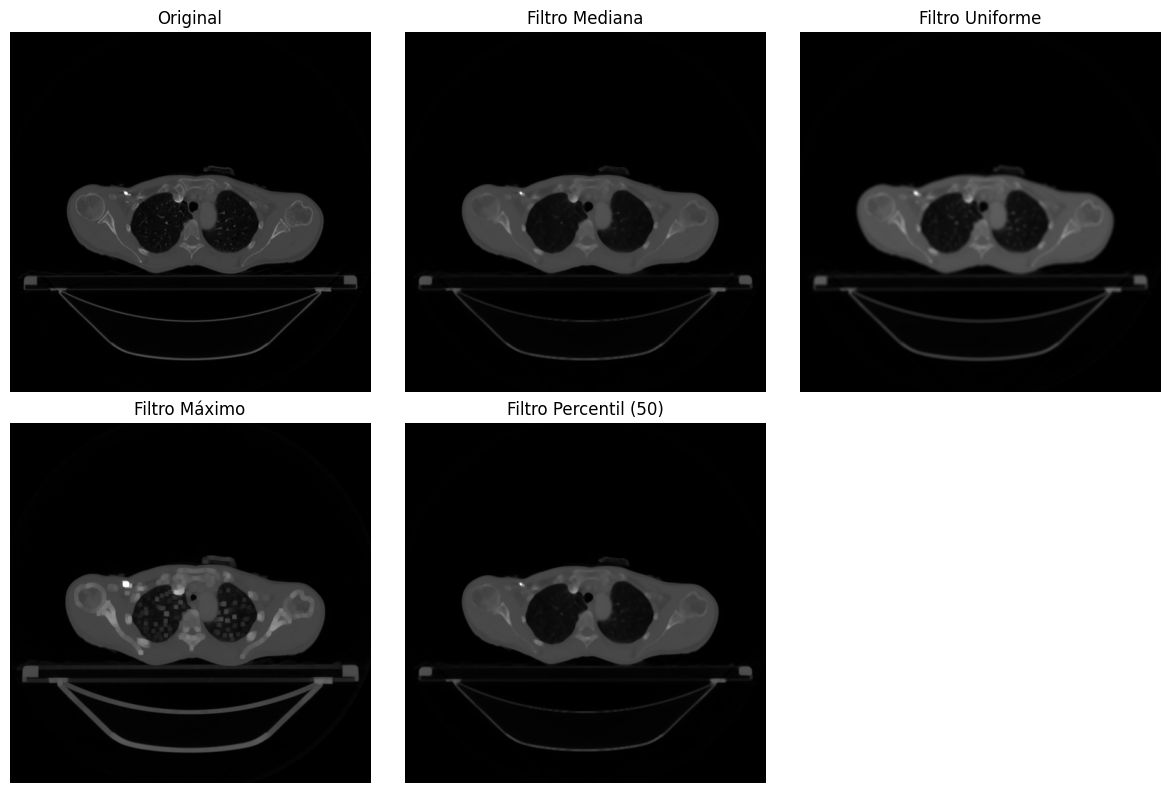

In [ ]:
from scipy.ndimage import median_filter, uniform_filter, maximum_filter, percentile_filter

# Definir el tamaño del kernel (ventana del filtro)
kernel_size = 5

# Aplicar los filtros
median_img = median_filter(img, size=kernel_size)
uniform_img = uniform_filter(img, size=kernel_size)
max_img = maximum_filter(img, size=kernel_size)
percentile_img = percentile_filter(img, percentile=50, size=kernel_size)  # Percentil 50 = mediana

# Crear una figura con subplots
plt.figure(figsize=(12, 8))

# Mostrar la imagen original
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

# Mostrar los filtros aplicados
plt.subplot(2, 3, 2)
plt.imshow(median_img, cmap='gray')
plt.title('Filtro Mediana')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(uniform_img, cmap='gray')
plt.title('Filtro Uniforme')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(max_img, cmap='gray')
plt.title('Filtro Máximo')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(percentile_img, cmap='gray')
plt.title('Filtro Percentil (50)')
plt.axis('off')

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()

In [ ]:
# aplica un filtro gasiano y varia el sigma ¿que utilidad tiene esto?

In [ ]:
# aplica un filtro sobel y discuta que útilidad puede tener este filtro

### Archivos NRRD
nrrd es otro formato que permite la manipulación de imágenes medicas

In [ ]:
import nrrd

In [ ]:
import nrrd
import numpy as np

# 1. Guardar la imagen original con metadatos espaciales
header_original = {
    'type': 'float32',  # Ajustar según tu tipo de datos
    'space': 'left-posterior-superior',
    'space directions': np.diag([1, 1, 1]).tolist(),  # Matriz de orientación
    'space origin': [0, 0, 0],  # Punto de origen
    'encoding': 'gzip'
}
nrrd.write('original.nrrd', volio, header=header_original)

# 2. Guardar la máscara con LOS MISMOS metadatos espaciales
header_mask = header_original.copy()  # Copiar los mismos metadatos
header_mask['type'] = 'uint8'  # Las máscaras suelen

### PipeLine radiomica

In [ ]:
from radiomics import featureextractor
from radiomics import firstorder, glcm, glrlm, glszm, gldm, ngtdm, shape
def listar_caracteristicas(label):
    all_features = {}
    # Crear instancias de cada clase de características
    shape_features= shape.RadiomicsShape.getFeatureNames()
    first_order_features = firstorder.RadiomicsFirstOrder.getFeatureNames()
    glcm_features = glcm.RadiomicsGLCM.getFeatureNames()
    glrlm_features = glrlm.RadiomicsGLRLM.getFeatureNames()
    glszm_features = glszm.RadiomicsGLSZM.getFeatureNames()
    gldm_features = gldm.RadiomicsGLDM.getFeatureNames()
    ngtdm_features = ngtdm.RadiomicsNGTDM.getFeatureNames()
    # all_features[f'{key}_label_{label}'] = value
    for key,value in shape_features.items():
        if value==False:
            all_features[f'original_shape_{key}_label_{label}'] = 0
    for key,value in first_order_features.items():
        if value==False:
            all_features[f'original_firstorder_{key}_label_{label}']=0
    for key,value in gldm_features.items():
        if value==False:
            all_features[f'original_gldm_{key}_label_{label}']=0
    for key,value in glrlm_features.items():
        if value==False:
            all_features[f'original_glrlm_{key}_label_{label}']=0
    for key,value in glszm_features.items():
        if value==False:
            all_features[f'original_glszm_{key}_label_{label}']=0
    for key,value in ngtdm_features.items():
        if value==False:
            all_features[f'original_ngtdm_{key}_label_{label}']=0
    for key,value in glcm_features.items():
        if value==False:
            all_features[f'original_glcm_{key}_label_{label}']=0
    return all_features



# Llamar a la función para listar las características
"""
Function to radiomics extractor
"""
def extract_radiomics_features(image_path, mask_path):
    # Cargar la imagen y la máscara
    image = sitk.ReadImage(image_path)
    mask = sitk.ReadImage(mask_path)
    # Configuración del extractor para excluir diagnósticos
    settings = {
        'binWidth': 25,
        'resampledPixelSpacing': None,
        'interpolator': 'sitkBSpline',
        'enableCExtensions': True,
        'minimumROIDimensions': 1,
        'minimumROISize': None,
        'normalize': False,
        'additionalInfo': False,  # Esto excluye la información de diagnóstico
        }
    # Configurar el extractor de características
    extractor = featureextractor.RadiomicsFeatureExtractor(**settings)
    # Diccionario para almacenar las características de todas las etiquetas
    all_features = {}
    #get the labels in mask image
    mask_array = sitk.GetArrayFromImage(mask)
    unique_labels = set(mask_array.flatten()) - {0}
    #loop to save radiomics
    labels=#get mask numbers
    for label in labels:
        #condicioon si existe la etiqueta en la imagen
        if label in unique_labels:
            # Extraer características para cada etiqueta
            extractor.settings['label'] = label
            features = extractor.execute(image, mask)
            # Agregar las características al diccionario
            for key, value in features.items():
                # Prefijar con la etiqueta para evitar colisiones de nombres
                all_features[f'{key}_label_{label}'] = value
        #condición sino existe la etiqueta (para siempre tener un numero igual de columnas)
        else:
            #crea un diccionario con valores en cero para todas las caracteristicas
            dicionario_vacio=listar_caracteristicas(label)
            for key, value in dicionario_vacio.items():
                all_features[key] = value
    return all_features


### otras vias de procesamiento


In [ ]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, iradon
from skimage.data import shepp_logan_phantom
from scipy.ndimage import rotate
from numpy.fft import fft, ifft, fftshift

In [ ]:
image = shepp_logan_phantom()
plt.imshow(image, cmap="gray")
plt.title("Imagen original")
plt.show()

In [ ]:
# Crear una imagen vacía para la reconstrucción
reconstructed_image = np.zeros_like(image)
# Retroproyectar cada proyección en la imagen reconstruida
for i, angle in enumerate(theta):
    # Crear una imagen en blanco y "esparcir" la proyección
    projection = np.tile(sinogram[i], (image.shape[1], 1)).T
    # Rotar la proyección de regreso al ángulo original
    backprojected = rotate(projection, -angle, reshape=False)
    # Acumular en la imagen reconstruida
    reconstructed_image += backprojected
# Normalizar la imagen reconstruida
reconstructed_image /= len(theta)
# cree un código que permita ver la imágen reconstruida

In [ ]:
# --- Aplicar filtro Ram-Lak a cada proyección ---
# Crear una copia del sinograma para almacenar las proyecciones filtradas
filtered_sinogram = np.zeros_like(sinogram)
n = sinogram.shape[1]

# Crear filtro Ram-Lak
frequencies = np.fft.fftfreq(n).reshape(-1, 1)  # Frecuencias en el dominio de Fourier
ramp_filter = np.abs(frequencies)  # Filtro Ram-Lak en el dominio de la frecuencia

for i in range(len(theta)):
    # Transformada de Fourier de la proyección
    projection_fft = fft(sinogram[i])
    # Aplicar el filtro multiplicando en el dominio de frecuencia
    filtered_projection_fft = projection_fft * ramp_filter.squeeze()
    # Transformada Inversa para obtener la proyección filtrada
    filtered_sinogram[i] = np.real(ifft(filtered_projection_fft))

# --- Reconstrucción de la imagen mediante retroproyección de proyecciones filtradas ---
# Crear una imagen vacía para la reconstrucción
reconstructed_image = np.zeros_like(image)

# Retroproyectar cada proyección filtrada en la imagen reconstruida
for i, angle in enumerate(theta):
    # Crear una imagen en blanco y "esparcir" la proyección filtrada
    projection = np.tile(filtered_sinogram[i], (image.shape[1], 1)).T
    # Rotar la proyección de regreso al ángulo original
    backprojected = rotate(projection, -angle, reshape=False)
    # Acumular en la imagen reconstruida
    reconstructed_image += backprojected

# Normalizar la imagen reconstruida
reconstructed_image /= len(theta)

# Mostrar la imagen reconstruida
plt.imshow(reconstructed_image, cmap="gray")
plt.title("Imagen reconstruida con retroproyección filtrada (FBP)")
plt.show()